**Manual Histogram Computation**

**Task**: Implement functions to compute a grayscale image histogram, cumulative distribution function (CDF), and perform histogram equalization — without using any histogram/equalization library functions.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Histogram Computation for RGB and Grayscale image. for grayscale we will take the image , find the intensity value and the frequency of the intensity value. For rgb we need to obtain 3 histogram. one for red, one for green, one for blue.


#a) Read the image
#b) Convert from 2D to 1D by using flatten()
#c) Initialize the list which will contain intensity count, as it's a 8 bit image so we need to find the counf of 0, 1, ..., 255. And increment the value of count by 1
#d) Plot the histogram


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 39, 87, 249, 888, 4110, 956451, 254862, 260178, 379647, 300408, 234285, 211989, 206142, 205050, 216984, 226089, 202881, 174867, 157494, 151563, 150867, 151539, 141963, 128559, 120906, 119775, 120432, 125997, 127833, 125112, 123375, 123609, 129060, 134970, 136407, 134463, 131196, 124983, 120618, 122787, 133866, 147483, 150699, 146970, 147486, 149847, 162156, 177333, 176253, 165267, 159219, 157014, 159828, 171606, 178521, 173427, 161934, 153009, 151068, 157587, 165885, 170439, 162678, 151167, 144786, 145848, 156003, 166326, 167307, 158586, 150663, 147168, 151131, 164304, 173322, 174039, 163215, 156216, 156390, 160467, 171798, 172329, 162183, 146853, 143337, 149943, 166563, 178197, 175122, 163947, 159444, 159360, 162975, 171069, 176157, 169050, 158736, 154827, 156726, 170358, 178185, 171036, 157023, 148257, 152649, 167580, 176367, 165843, 148557, 137250, 135930, 143307, 154782, 162168, 149712, 137553, 131658, 139251, 146115, 143805, 132177, 124401, 118635

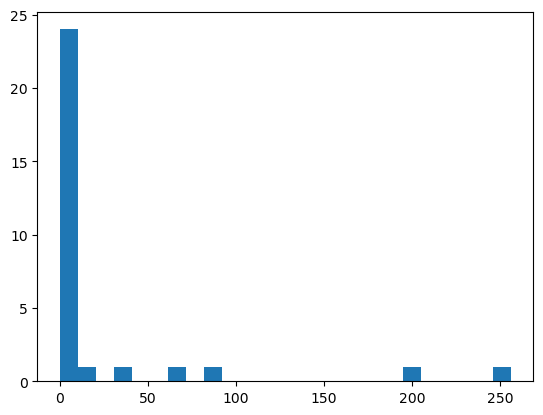

In [2]:
from skimage import io
import matplotlib.pyplot as plt
img_input = io.imread(r"D:\DCIM\20220428_114250.jpg")

#print(img_input)
#print(img_input.shape)


f_img= img_input.flatten()
#print(f_img)
#print(f_img.shape)
def compute_histogram(img_input):
  f_img= img_input.flatten()
  hist= [0]*256
  for i in f_img:
    hist[i]= hist[i]+1
  return hist
print(compute_histogram(img_input))
a=  compute_histogram(img_input)
plt.hist(compute_histogram(img_input), bins= 25,  range= (0, 256))
plt.show()

# CDF represents pixels having intensity lesser than or equal to k
# hist[k] implies the pixels with intensity k, 0<=k<=255
# running total of histogram values
#CDF(k):- summation of hist(i), i is from 0 to k


#Intensity   Count
#0           5
#1           8
#2           12
#3           6
#4           9

cdf[0]= 5
cdf[1]= 13

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 48, 135, 384, 1272, 5382, 961833, 1216695, 1476873, 1856520, 2156928, 2391213, 2603202, 2809344, 3014394, 3231378, 3457467, 3660348, 3835215, 3992709, 4144272, 4295139, 4446678, 4588641, 4717200, 4838106, 4957881, 5078313, 5204310, 5332143, 5457255, 5580630, 5704239, 5833299, 5968269, 6104676, 6239139, 6370335, 6495318, 6615936, 6738723, 6872589, 7020072, 7170771, 7317741, 7465227, 7615074, 7777230, 7954563, 8130816, 8296083, 8455302, 8612316, 8772144, 8943750, 9122271, 9295698, 9457632, 9610641, 9761709, 9919296, 10085181, 10255620, 10418298, 10569465, 10714251, 10860099, 11016102, 11182428, 11349735, 11508321, 11658984, 11806152, 11957283, 12121587, 12294909, 12468948, 12632163, 12788379, 12944769, 13105236, 13277034, 13449363, 13611546, 13758399, 13901736, 14051679, 14218242, 14396439, 14571561, 14735508, 14894952, 15054312, 15217287, 15388356, 15564513, 15733563, 15892299, 16047126, 16203852, 16374210, 16552395, 16723431, 16880454, 17028711, 171813

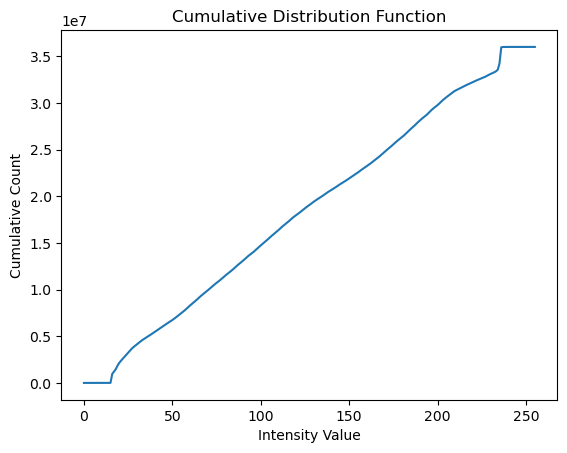

In [3]:
def compute_cdf(hist):
  cdf = [0] * len(hist)
  cdf[0] = hist[0]
  for i in range(1, len(hist)):
    cdf[i] = cdf[i-1] + hist[i]
  return cdf

cdf_values = compute_cdf(a)
print(cdf_values)

print(len(cdf_values))

plt.plot(cdf_values)

plt.title('Cumulative Distribution Function')
plt.xlabel('Intensity Value')
plt.ylabel('Cumulative Count')
plt.show()

# Histogram equalization is used to contrast enhancement.

#1. Compute histogram
#2. Compute CDF
#3. Normalizing CDF

# Sk= ((CDF[k]- CDFmin)/(MN- CDFmin))*255
#M: height, N: width; we need to perform this as our task is to put the pixel o fthe enhanced image also in the range of 0 to 255
#4. Replacing each pixel

#Intensity(k)   hist[k]       CDF
#0                0           0
#1                0           0
#2                5           5
#3                10          15
#4                5           20



#k      CDF     o/p

#2       5       0
#3       15      170
#4       20      255

# if not done correctly image will be unexpectedly bright.

In [4]:
import numpy as np

def hist_equalization(img_input):
    # Step 1: Compute histogram
    hist = compute_histogram(img_input)

    # Step 2: Compute CDF
    cdf = compute_cdf(hist)
    cdf = np.array(cdf)

    # Step 3: Find first non-zero CDF value
    cdf_min = cdf[np.nonzero(cdf)][0]
    total_pixels = img_input.size

    # Step 4: Normalize CDF
    cdf_normalized = (cdf - cdf_min) / (total_pixels - cdf_min)
    cdf_scaled = np.round(cdf_normalized * 255).astype(np.uint8)

    # Step 5: Map original image pixels
    img_flat = img_input.flatten()
    img_equalized_flat = cdf_scaled[img_flat]

    # Step 6: Reshape to original shape
    img_output = img_equalized_flat.reshape(img_input.shape)

    return img_output

In [9]:
# def hist_equalization(img_input):
#   hist = compute_histogram(img_input)
#   cdf = compute_cdf(hist)

#   cdf_min = min(cdf)
#   cdf_max = max(cdf)

#   cdf_normalized = [(i  - cdf_min) * 255 / (cdf_max - cdf_min) for i in cdf]
#   img_output = [0] * len(img_input)
#   for i in range(len(img_input)):
#     img_output[i] = [cdf_normalized[pixel] for pixel in img_input]
#   return img_output


# plt.plot(img_output)
# plt.show()

In [7]:
# def hist_equalization(img_input):
#     hist = compute_histogram(img_input)
#     cdf = compute_cdf(hist)
#     cdf_min = min(cdf)
#     cdf_max = max(cdf)


#     cdf_normalized =[(i  - cdf_min) * 255 / (cdf_max - cdf_min) for i in cdf]


#     img_output = [cdf_normalized[pixel] for pixel in img_input]
#     return img_output


In [8]:
# plt.hist(img_output)